*********PACKAGES**********

In [1]:
library(dplyr)
library(tidyverse)
library(data.table)
library(lubridate)
library(ggplot2)
library(ggthemes)
library(caret)
library(scales)
library(corrplot)
library(qcc)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0     ✔ purrr   0.3.5
✔ tibble  3.1.8     ✔ stringr 1.5.0
✔ tidyr   1.2.1     ✔ forcats 0.5.2
✔ readr   2.1.3     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘data.table’


The following object is masked from ‘package:purrr’:

    transpose


The following objects are masked from ‘package:dplyr’:

    between, first, last


Loading required package: timechange


Attaching package: ‘lubridate’


The following objects are masked from ‘package:data.table’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects ar

****IMPORT DATASET****

In [2]:
movies<- read.csv("/kaggle/input/tmdbdata/tmdb  updated.csv")

********OVER VIEW OF DATA********

In [3]:
head(movies)
tail(movies)
dim(movies)
summary(movies)
str(movies)
colnames(movies)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,⋯,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,popularity_level,Rotten.Tomatoes.Ratings..,Audience.Ratings..,rating
,<int>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,⋯,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<dbl>
1,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vincent D'Onofrio|Nick Robinson,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,⋯,5562,6.5,2015,137999939,1392445893,1363528810,High,87,81,4.0
2,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nicholas Hoult|Josh Helman,George Miller,120,Action|Adventure|Science Fiction|Thriller,⋯,6185,7.1,2015,137999939,348161292,228436354,High,9,44,1.5
3,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel Elgort|Miles Teller,Robert Schwentke,119,Adventure|Science Fiction|Thriller,⋯,2480,6.3,2015,101199956,271619025,185238201,High,30,52,4.0
4,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam Driver|Daisy Ridley,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,⋯,5292,7.5,2015,183999919,1902723130,1868178225,High,93,84,4.0
5,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle Rodriguez|Dwayne Johnson,James Wan,137,Action|Crime|Thriller,⋯,2947,7.3,2015,174799923,1385748801,1316249360,High,55,70,4.0
6,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhnall Gleeson|Paul Anderson,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,⋯,3929,7.2,2015,124199945,490314247,397950503,High,39,63,4.0


,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,⋯,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,popularity_level,Rotten.Tomatoes.Ratings..,Audience.Ratings..,rating
,<int>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,⋯,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<dbl>
1282,253,tt0070328,1.549139,7000000,161777836,Live and Let Die,Roger Moore|Yaphet Kotto|Jane Seymour|Clifton James|Julius Harris,Guy Hamilton,121,Adventure|Action|Thriller,⋯,293,6.1,1973,34378117,794516769,154777836,Moderately High,73,67,4.0
1283,660,tt0059800,1.910465,11000000,141195658,Thunderball,Sean Connery|Claudine Auger|Adolfo Celi|Luciana Paluzzi|Rik Van Nutter,Terence Young,130,Adventure|Action|Thriller,⋯,331,6.3,1965,76126201,977153544,130195658,Moderately High,43,60,4.0
1284,668,tt0064757,1.778746,7000000,81974493,On Her Majesty's Secret Service,George Lazenby|Diana Rigg|Telly Savalas|Gabriele Ferzetti|Ilse Steppat,Peter R. Hunt,142,Adventure|Action|Thriller,⋯,258,6.4,1969,41609849,487278044,74974493,Moderately High,31,56,4.5
1285,948,tt0077651,1.198849,300000,70000000,Halloween,Donald Pleasence|Jamie Lee Curtis|P.J. Soles|Nancy Kyes|Nick Castle,John Carpenter,91,Horror|Thriller,⋯,522,7.3,1978,1002810,233989049,69700000,Moderately High,51,50,5.0
1286,8469,tt0077975,1.157930,2700000,141000000,Animal House,John Belushi|Tim Matheson|John Vernon|Verna Bloom|Tom Hulce,John Landis,109,Comedy,⋯,230,6.7,1978,9025292,471320798,138300000,Moderately High,37,40,5.0
1287,203793,tt1966566,0.010335,30000000,68129518,Ð¡Ñ‚Ð°Ð»Ð¸Ð½Ð³Ñ€Ð°Ð´,Thomas Kretschmann|Yanina Studilina|Philippe Reinhardt|Heiner Lauterbach|Maria Smolnikova,Fyodor Bondarchuk,131,War|Action,⋯,64,5.5,2013,28081001,63771501,38129518,Moderately High,93,84,5.0


[1] 1287   22

       id           imdb_id            popularity           budget        
 Min.   :    11   Length:1287        Min.   : 0.01034   Min.   :1.00e+00  
 1st Qu.:  5852   Class :character   1st Qu.: 0.66478   1st Qu.:1.40e+07  
 Median : 20178   Mode  :character   Median : 1.15235   Median :3.20e+07  
 Mean   : 52558                      Mean   : 1.78602   Mean   :5.20e+07  
 3rd Qu.: 62210                      3rd Qu.: 2.12534   3rd Qu.:7.00e+07  
 Max.   :333348                      Max.   :32.98576   Max.   :4.25e+08  
    revenue          original_title         cast             director        
 Min.   :4.300e+01   Length:1287        Length:1287        Length:1287       
 1st Qu.:2.565e+07   Class :character   Class :character   Class :character  
 Median :8.209e+07   Mode  :character   Mode  :character   Mode  :character  
 Mean   :1.762e+08                                                           
 3rd Qu.:2.141e+08                                                           
 Max.  

'data.frame':	1287 obs. of  22 variables:
 $ id                       : int  135397 76341 262500 140607 168259 281957 87101 286217 211672 150540 ...
 $ imdb_id                  : chr  "tt0369610" "tt1392190" "tt2908446" "tt2488496" ...
 $ popularity               : num  32.99 28.42 13.11 11.17 9.34 ...
 $ budget                   : int  150000000 150000000 110000000 200000000 190000000 135000000 155000000 108000000 74000000 175000000 ...
 $ revenue                  : num  1.51e+09 3.78e+08 2.95e+08 2.07e+09 1.51e+09 ...
 $ original_title           : chr  "Jurassic World" "Mad Max: Fury Road" "Insurgent" "Star Wars: The Force Awakens" ...
 $ cast                     : chr  "Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vincent D'Onofrio|Nick Robinson" "Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nicholas Hoult|Josh Helman" "Shailene Woodley|Theo James|Kate Winslet|Ansel Elgort|Miles Teller" "Harrison Ford|Mark Hamill|Carrie Fisher|Adam Driver|Daisy Ridley" ...
 $ director                 :

[1] "id"                        "imdb_id"                  
 [3] "popularity"                "budget"                   
 [5] "revenue"                   "original_title"           
 [7] "cast"                      "director"                 
 [9] "runtime"                   "genres"                   
[11] "production_companies"      "release_date"             
[13] "vote_count"                "vote_average"             
[15] "release_year"              "budget_adj"               
[17] "revenue_adj"               "profit"                   
[19] "popularity_level"          "Rotten.Tomatoes.Ratings.."
[21] "Audience.Ratings.."        "rating"

****************Graphs********************

This graph is comparion between the rating and release year.
Here x is rating and y axis as release_year.
The plot is used is geom_jitter(),A jitter plot represents data points in the form of single dots.

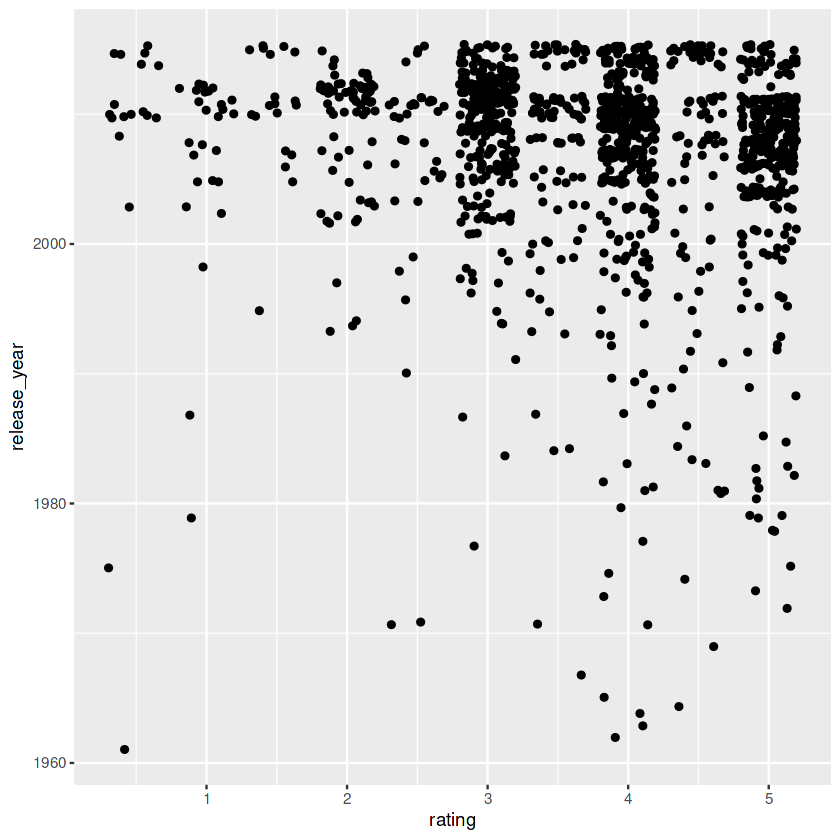

In [4]:
ggplot(movies) +
  aes(x =rating, y =release_year,) +
  geom_jitter()

************Count number of each rating************

In [5]:
movies %>% 
  group_by(rating) %>% 
  summarise(count=n())

rating,count
<dbl>,<int>
0.5,18
1.0,26
1.5,19
2.0,76
2.5,37
3.0,266
3.5,96
4.0,354
4.5,84


******Table with release_year,id,count******

******Count number of popularity level******

*************DISTRIBUTION OF IMPORTANT VARIABLES**************
The varibles are:
                *Profit
                *vote_count
                *Rating
                *Budget
                *Revenue
                *Run-time
                *Popularity
  The graph used in the distribution is histogram graph.****

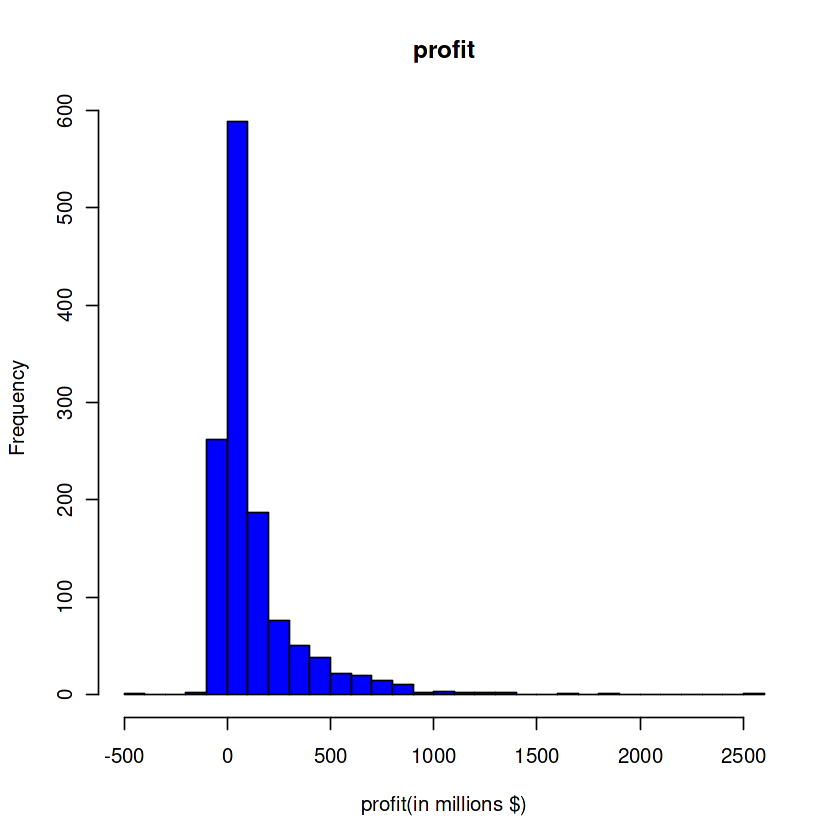

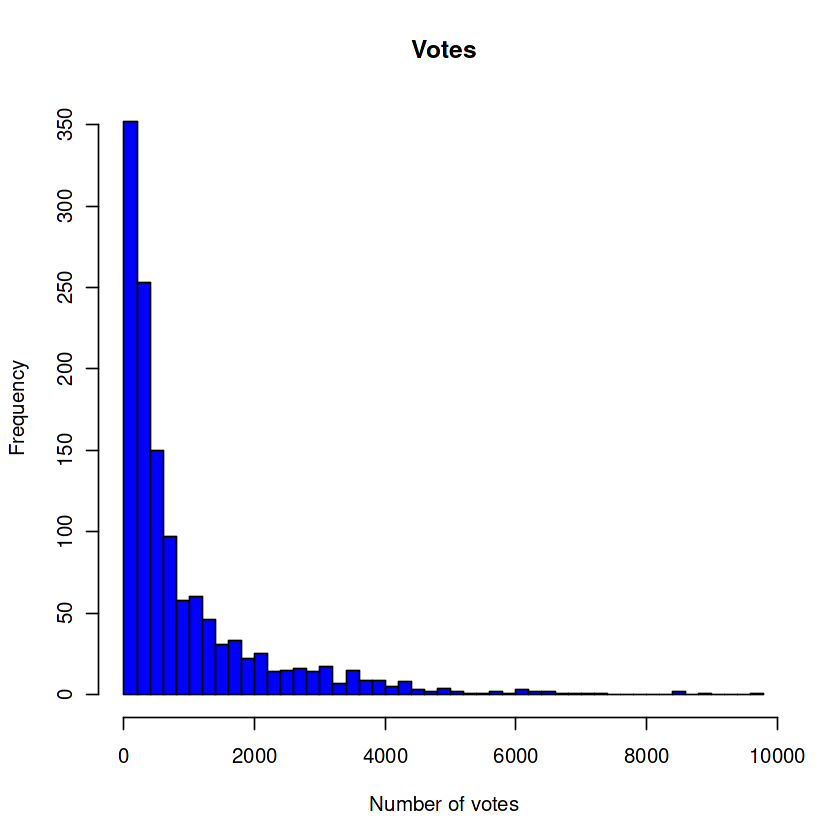

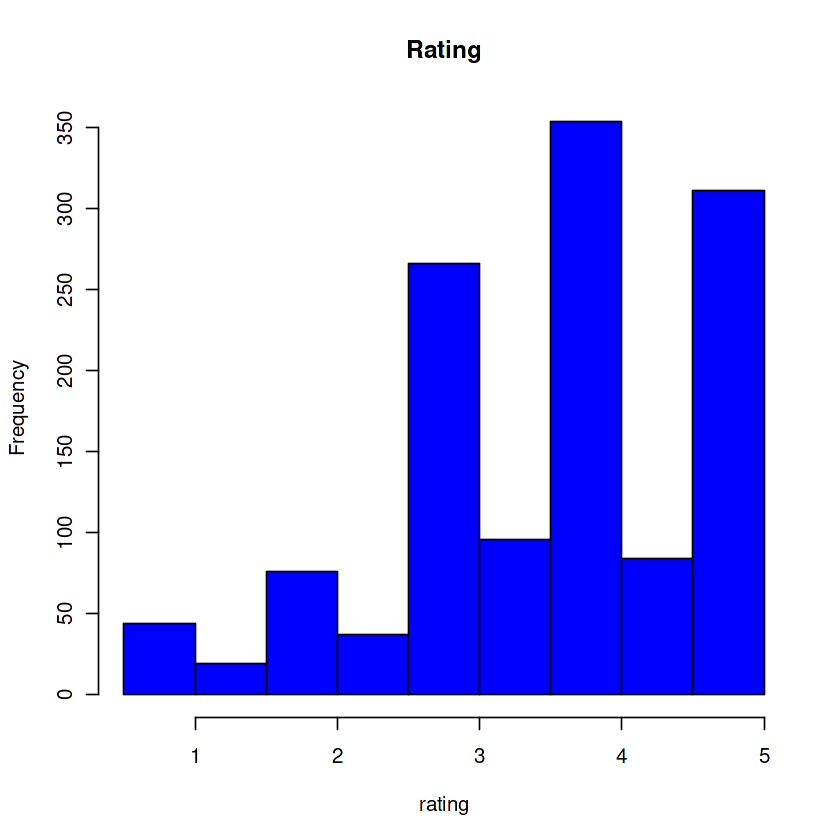

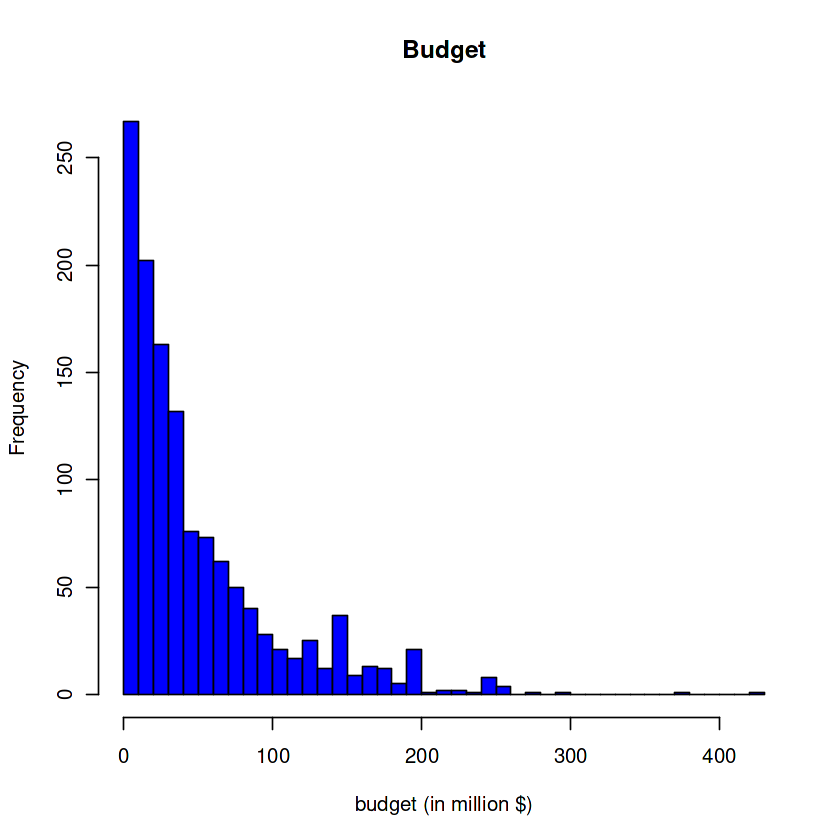

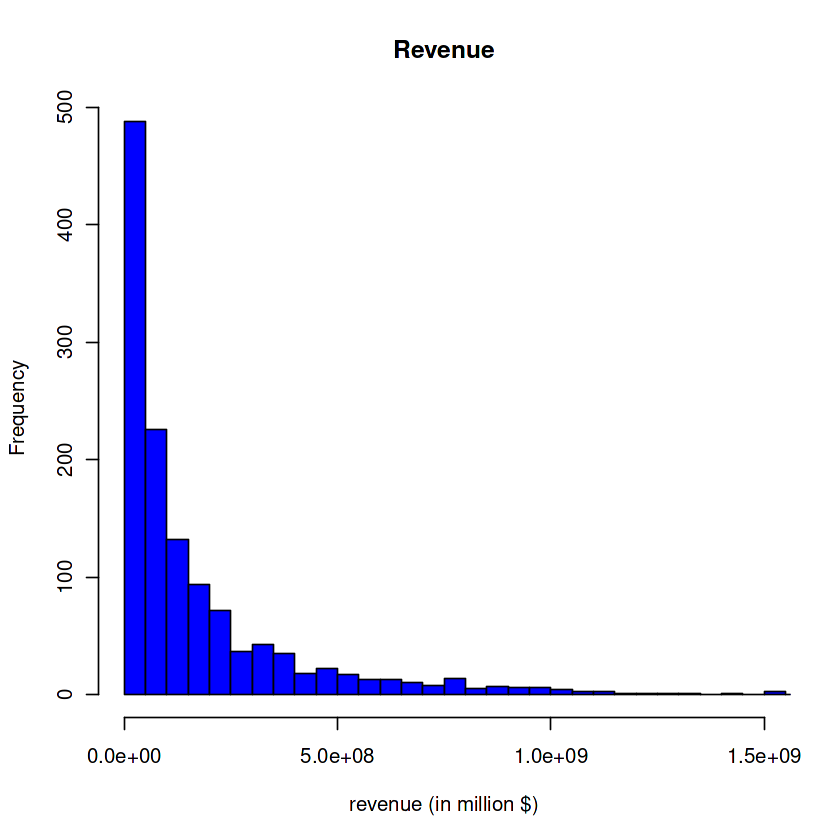

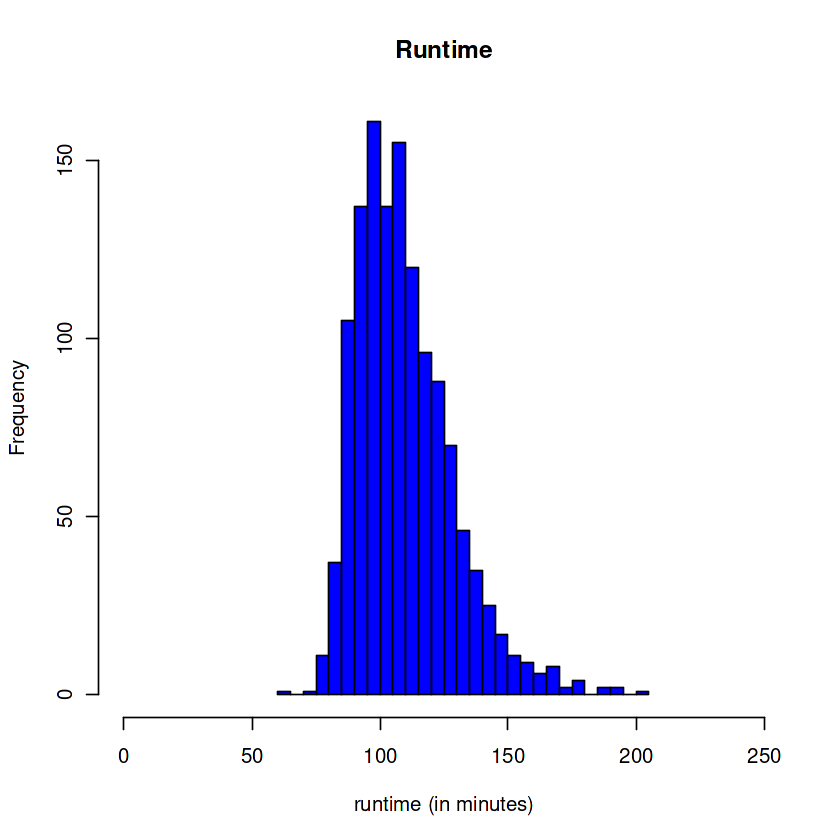

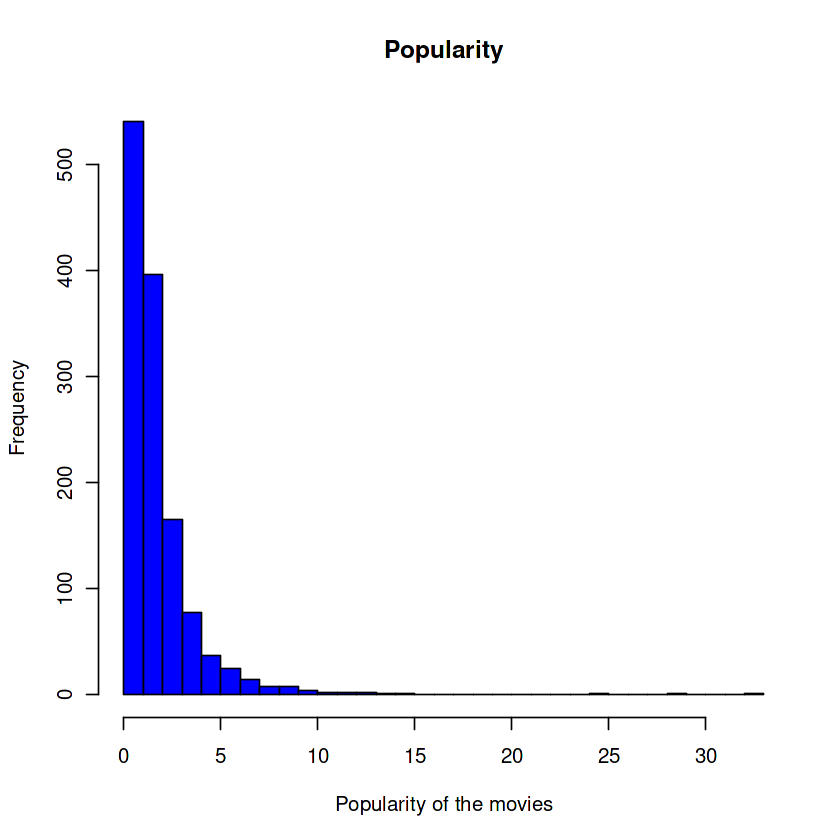

In [6]:
hist(movies$profit/1000000,col='blue',breaks=40,main='profit',xlab='profit(in millions $)')
hist(movies$vote_count,col = 'blue',breaks=40,main='Votes',xlab='Number of votes')
hist(movies$rating,col = 'blue',,main='Rating',xlab='rating')
hist(movies$budget/1000000,col = 'blue',breaks=40,main='Budget',xlab = 'budget (in million $)')
hist(movies$revenue,col = 'blue',breaks=40,main='Revenue',xlab = 'revenue (in million $)',xlim=c(0,1500000000))
hist(movies$runtime,col = 'blue',breaks=40,main='Runtime',xlab = 'runtime (in minutes)',xlim=c(0,250))
hist(movies$popularity,col = 'blue',breaks=40,main='Popularity',xlab = 'Popularity of the movies')

***Here popularity of movies among the pepople is taken for analysis.In data set moveis popularity is grouped by using group_by() function that helps to group the similar data in the the column here valeues are grouped in four different segments as HIGH,MEDIUM,MODERATLY HIGH,LOW.Summarise() function is used to count the number of smilar data.And print the value in the order of descending order.In the data set the three segment namely HIGH,MEDIUM,MODERATLY HIGH has the count of 322.Other LOW has count of  321.For this count graph has drawn.From the solution it is said that the movies are comes under four segments(HIGH,MEDIUM,MODERATLY HIGH,LOW) they are equally shared. ****

In [7]:
popularity=movies %>%
  group_by(popularity_level) %>%
  summarise(count = n()) %>%
  top_n(10) %>%
  arrange(desc(count))
popularity

Selecting by count


popularity_level,count
<chr>,<int>
High,322
Medium,322
Moderately High,322
Low,321


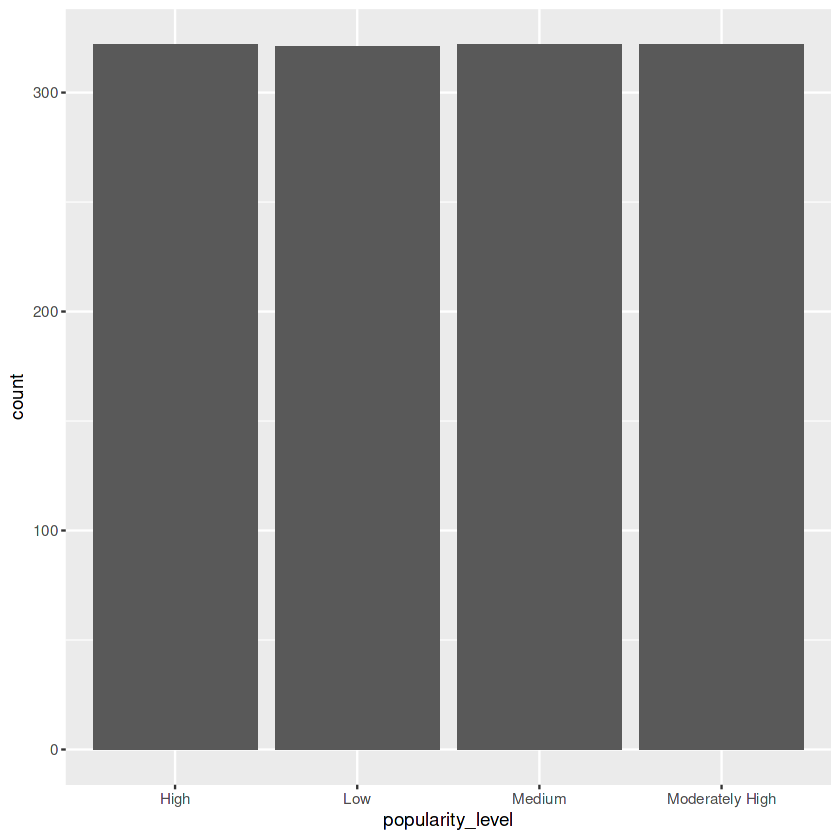

In [8]:
ggplot(data=popularity,mapping = aes(x =popularity_level, y = count)) +
    geom_col()

****Correlation analysis measures how two variables are related.Here the correltion test is perfromed between the profit and revenue.As profit changes in value, the revenue tends to change in a specific direction.The correlation value lies between -1 to 1.Here the value is 0.98391420318433,this lies in the range.The correlation of r = 0.98391420318433 suggests a strong, positive association between movie profit and revenue.In addition graphs are drawn using profit and revenue.First graph just plots profit and revenue.
Second graph is drawn using corrplot(cor()) function,this provides a visual exploratory tool on correlation.***

In [9]:
corr_movies=cor(movies$profit,movies$revenue,use="complete.obs")
corr_movies

[1] 0.9839142

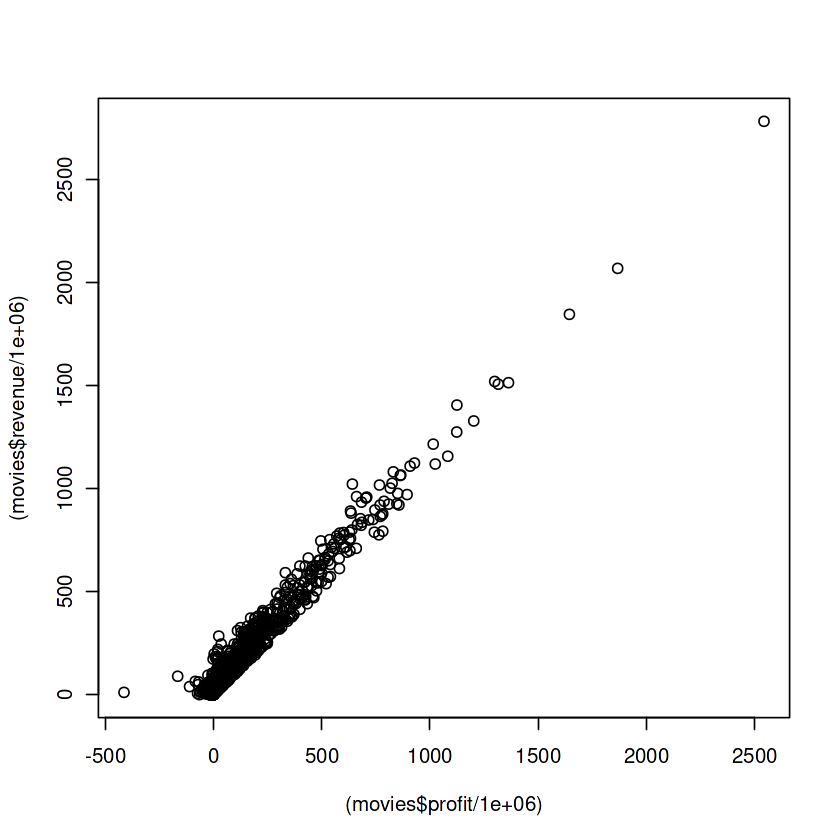

In [10]:
plot((movies$profit/1000000),(movies$revenue/1000000))

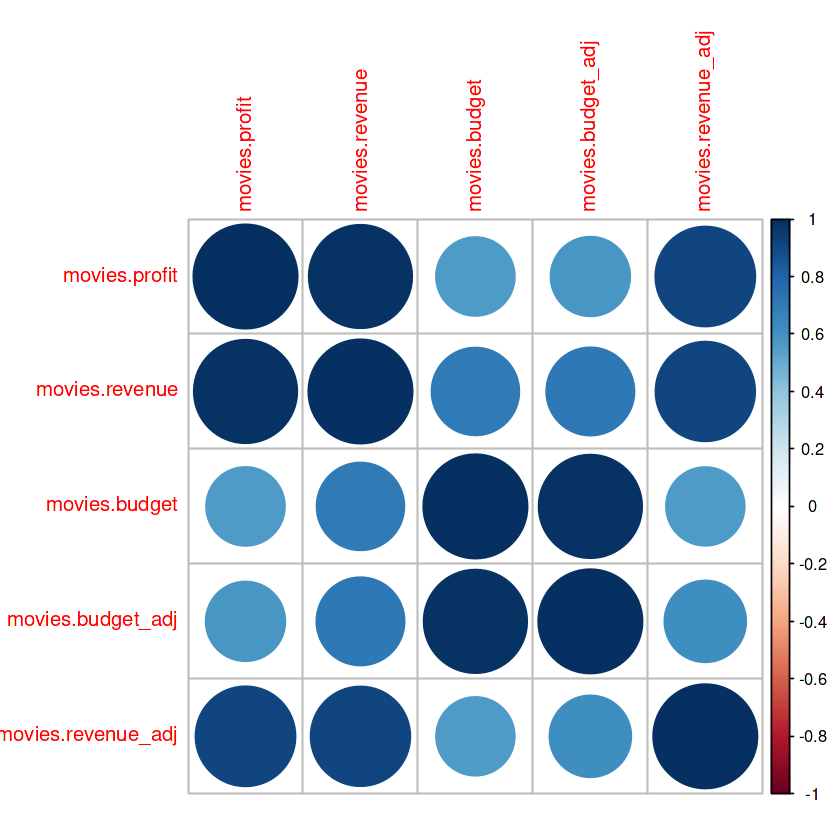

In [11]:
df<-data.frame(movies$profit,movies$revenue,movies$budget,movies$budget_adj,movies$revenue_adj)
corrplot(cor(df))

****

****Correlation analysis measures how two variables are related.Here the correltion test is perfromed between the budget and revenue.The correlation value lies between -1 to 1.Here the value is 0.706888435309043,this lies in the range.A significant and positive relationship exists between budget and revenue.The correlation of r = 0.706888435309043 shows a significant and positive relationship exists between budget and revenue.In addition graphs are drawn using budget and revenue.First graph just plots budget and revenue.
Second graph is drawn using corrplot(cor()) function,this provides a visual exploratory tool on correlation.***

In [12]:
cor(movies$budget,movies$revenue, use="complete.obs")

[1] 0.7068884

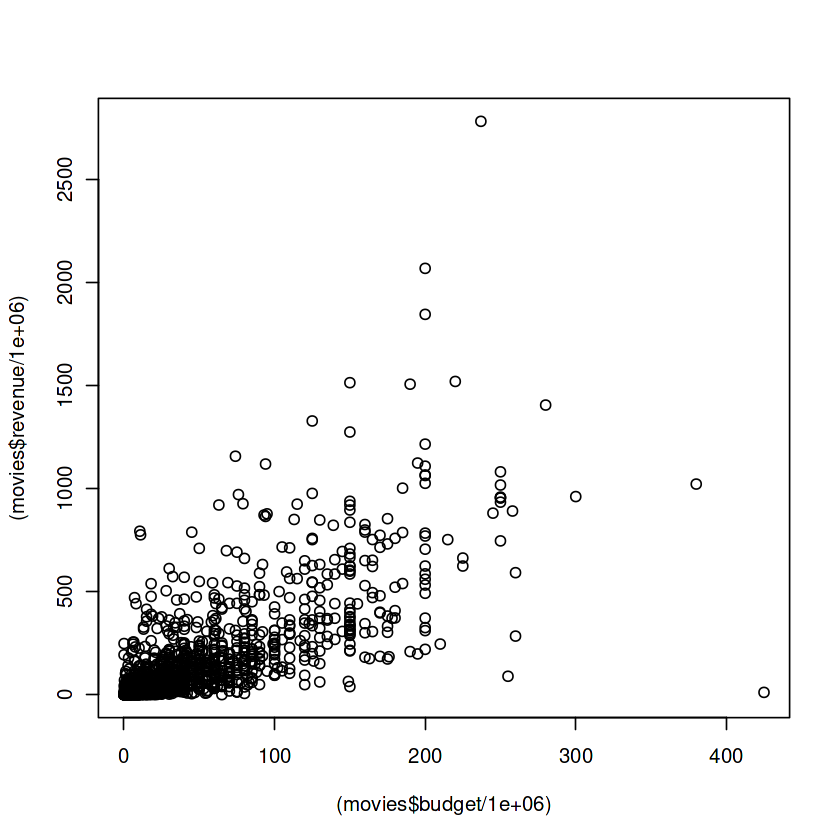

In [13]:
plot((movies$budget/1000000),(movies$revenue/1000000))

************Next is to identify the top 10 high budget movies in the dataset.Here movies budget is ordered in descending,selecting only 10 values.In ploting the graph reorder title and budget and display the geom_plot.In x axis denotes the budget and y-axis denotes the movie title.From this plot it is concluded that THE WARRIOR'S WAY comes in first positon followed by PRIATES OF CARRIBBEAN movies.************

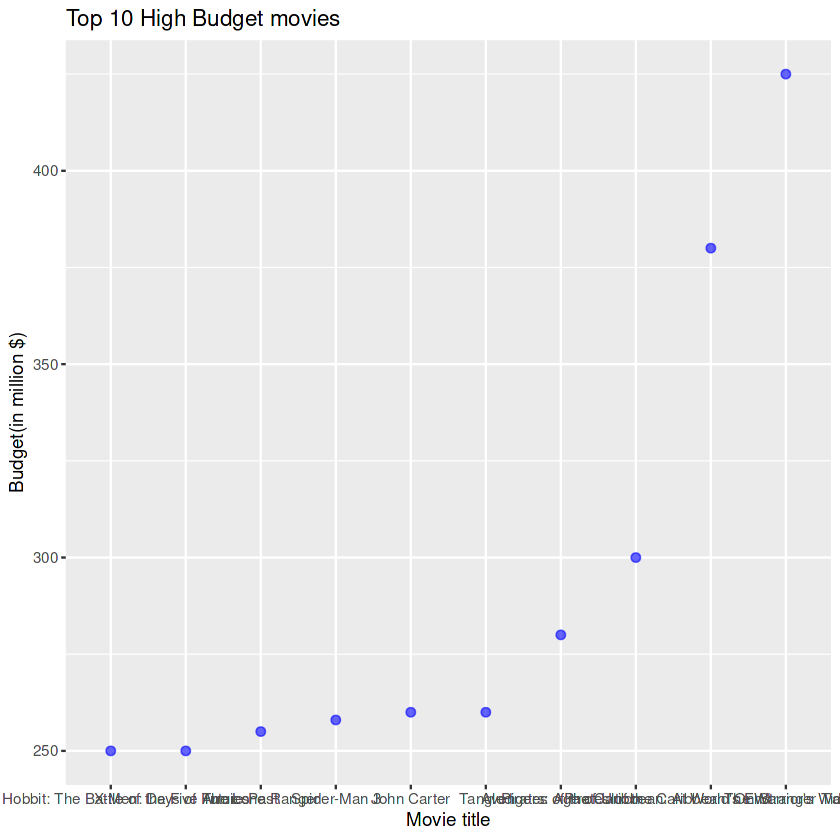

In [14]:
movies_cost <- movies[order(-movies$budget),]%>%head(n=10)
ggplot(data=movies_cost,aes(x=reorder(original_title,budget),y=budget/1000000))+
geom_point(size=2, alpha=0.6,color="blue")+
labs(title="Top 10 High Budget movies ",y="Budget(in million $)",x="Movie title")



************Next is to identify the top 10 grossing movies in the dataset.Here movies revenue is ordered in descending,selecting only 10 values.In ploting the graph reorder title and revenue and display the geom_bar().In x axis denotes the revenue and y-axis denotes the movie title.From this plot it is concluded that AVATAR is top grossing movie in the dataset,followed by STAR WARS movie.************

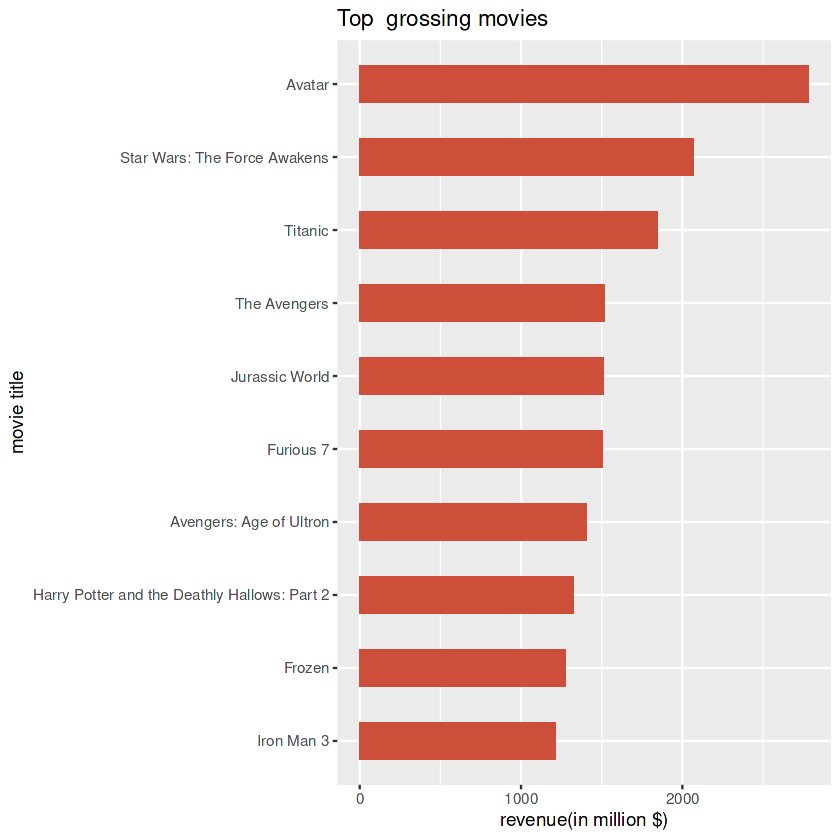

In [15]:
movies_gross<- movies[order(-movies$revenue),] %>% head(n=10)
ggplot(data=movies_gross,aes(x=reorder(original_title,revenue), y=revenue/1000000))+
geom_bar(stat="identity", width=.5,fill="tomato3")+
labs(title="Top  grossing movies",y="revenue(in million $)",x="movie title")+
coord_flip()

**************Multiple regression is an extends of linear regression into relationship between more than two variables.Here different categories are used for calculation for example:id,budget,revenue,runtime,vote_count,vote_average,release_year,rating.In multiple regression we have more than one predictor variable and one response variable.And the values are ploted using plot() function. **************

In [16]:
movie_sub <- subset(movies, select = c(id,budget,revenue,runtime,vote_count,vote_average,release_year,rating))

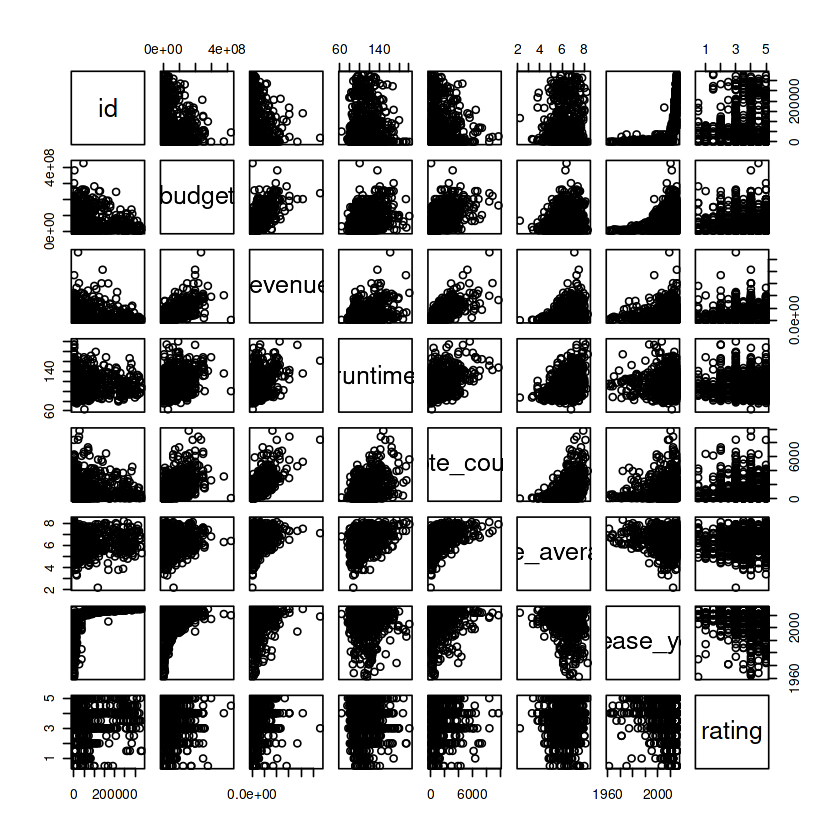

In [17]:
pairs(movie_sub)

************Director analysis************

**********Diretor analysis**********
******First group the director and get the number of movies directed by each director and arrange it in the descending order.Plot the bargraph for ******

In [18]:
director_ana=movies %>% 
  group_by(director) %>% 
  summarise(count=n())%>%
top_n(10) %>%
  arrange(desc(count))
director_ana

Selecting by count


director,count
<chr>,<int>
John Carpenter,12
Steven Spielberg,11
Steven Soderbergh,10
Clint Eastwood,8
Peter Jackson,8
Ridley Scott,8
Robert Zemeckis,8
Christopher Nolan,7
David Fincher,7


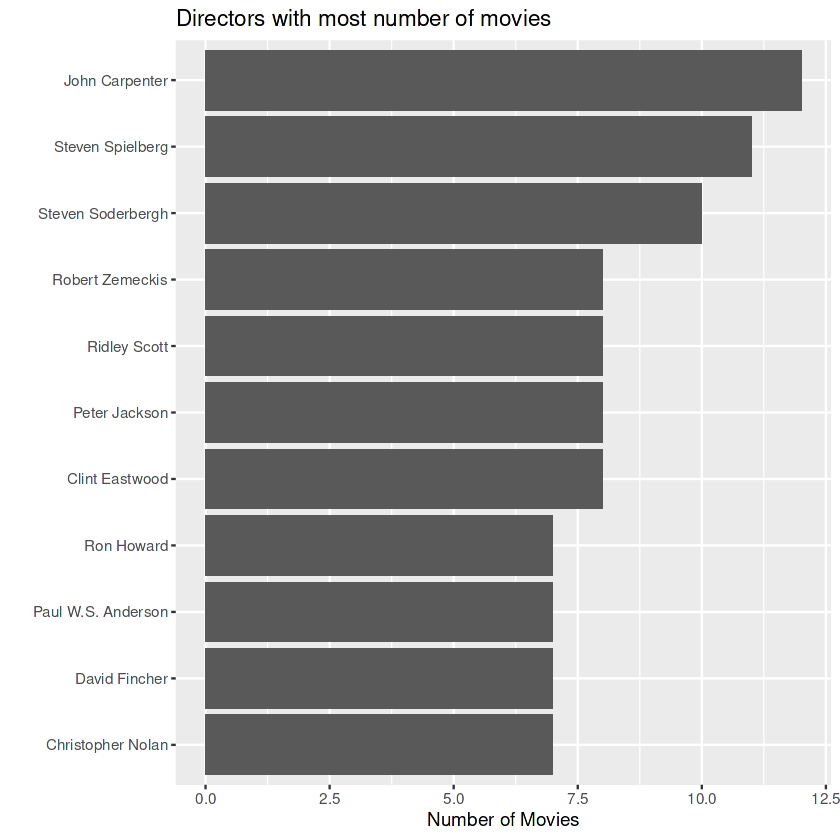

In [19]:
ggplot(data=director_ana,aes(x=reorder(director,count),y=count))+
  geom_bar(stat = "identity")+
  coord_flip()+
  ylab("Number of Movies")+
  ggtitle("Directors with most number of movies")+
  xlab("")

director,profit_share
<chr>,<dbl>
Colin Trevorrow,1363.5288
Joss Whedon,1212.2968
Chris Buck|Jennifer Lee,1124.2190
Kyle Balda|Pierre Coffin,1082.7310
James Cameron,1066.3880
Shane Black,1015.4400
Lee Unkrich,863.1719
David Yates,844.8239
Steve Martino|Mike Thurmeier,782.2448


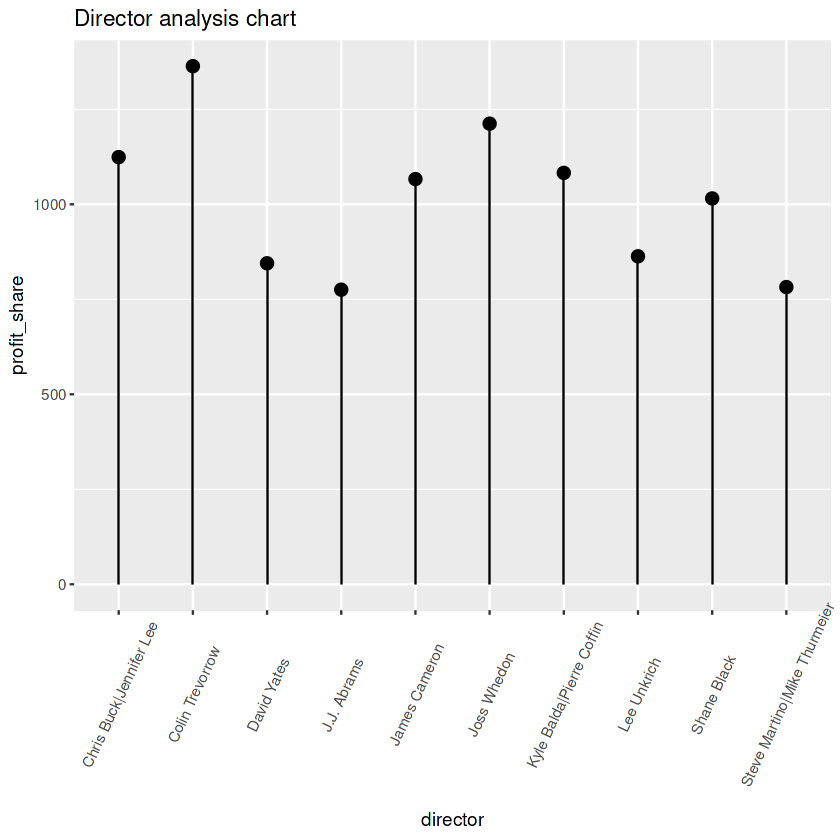

In [20]:
director_analysis=movies %>%
  group_by(director) %>%
  summarise(profit_share = mean(profit/1000000)) %>%
  arrange(desc(profit_share)) %>%
  top_n(10, profit_share)
director_analysis
ggplot(data=director_analysis, aes(x=director, y=profit_share)) + 
  geom_point(size=3) + 
  geom_segment(aes(x=director,xend=director, y=0, 
                   yend=profit_share)) + 
  labs(title="Director analysis chart") + 
  theme(axis.text.x = element_text(angle=65, vjust=0.6))

**************Profit analysis**************

In [21]:
movies$profit <- movies$revenue- movies$budget
summary(movies$profit)


      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-413912431    3142641   45243000  124240946  147006968 2544505847 

In [22]:
movies$profit_m <- movies$profit/1000000
movies$budget_m <- movies$budget/1000000
movies$revenue_m <- movies$revenue/1000000
movies$profitable[movies$revenue>movies$budget] <- 1
movies$profitable[movies$revenue<=movies$budget] <- 0
movies$profitable <- as.factor(movies$profitable)
movies$profitable
table(movies$profitable)

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [38] 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [149] 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [186] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [223] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [260] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [297] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1
 [334] 0 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1 0 1 0 0
 [371] 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 1
 [408] 0 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 1 0 1
 [445] 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0
 [482] 0 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1
 [519] 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 0 1
 [556] 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 1
 [593] 1 1 1 0 1 1 1 1 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 0 1
 [630] 1 0 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1
 [667] 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0
 [704] 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1
 [741] 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 0 1 0 0 1
 [778] 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 0 1 1 0 1
 [815] 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0
 [852] 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1
 [889] 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1
 [926] 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 [963] 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
[1000] 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1
[1037] 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1074] 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
[1111] 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
[1148] 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
[1185] 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1
[1222] 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
[1259] 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
Levels: 0 1


   0    1 
 265 1022 

************TIME SERIES ANALYSIS ************

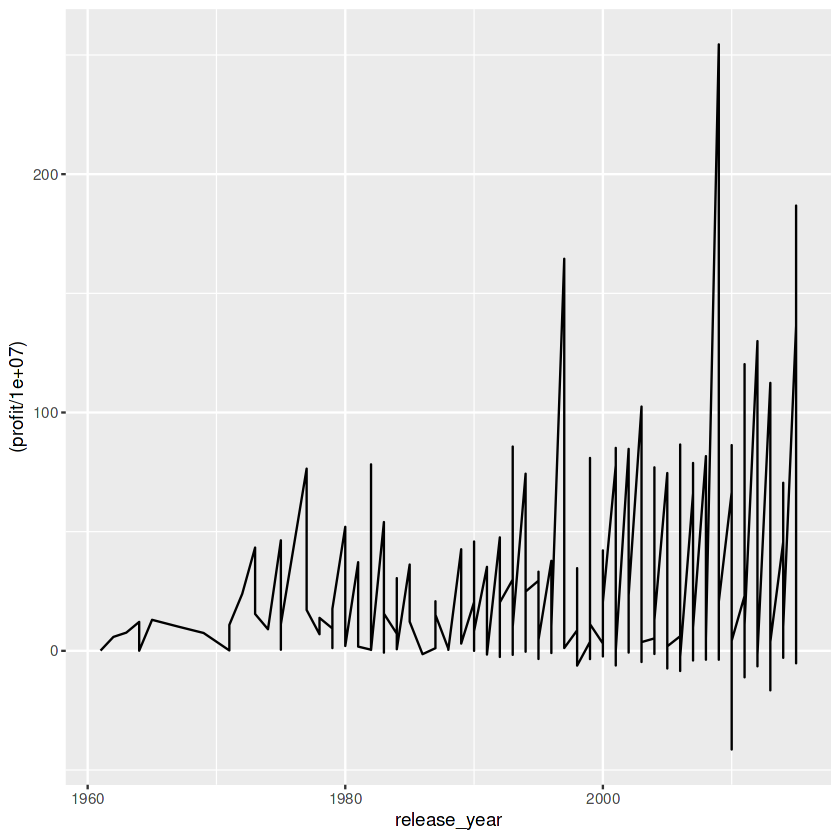

In [23]:
p <- ggplot(movies, aes(x=release_year, y=(profit/10000000))) +
       geom_line()
p

******TREND ANALYSIS******

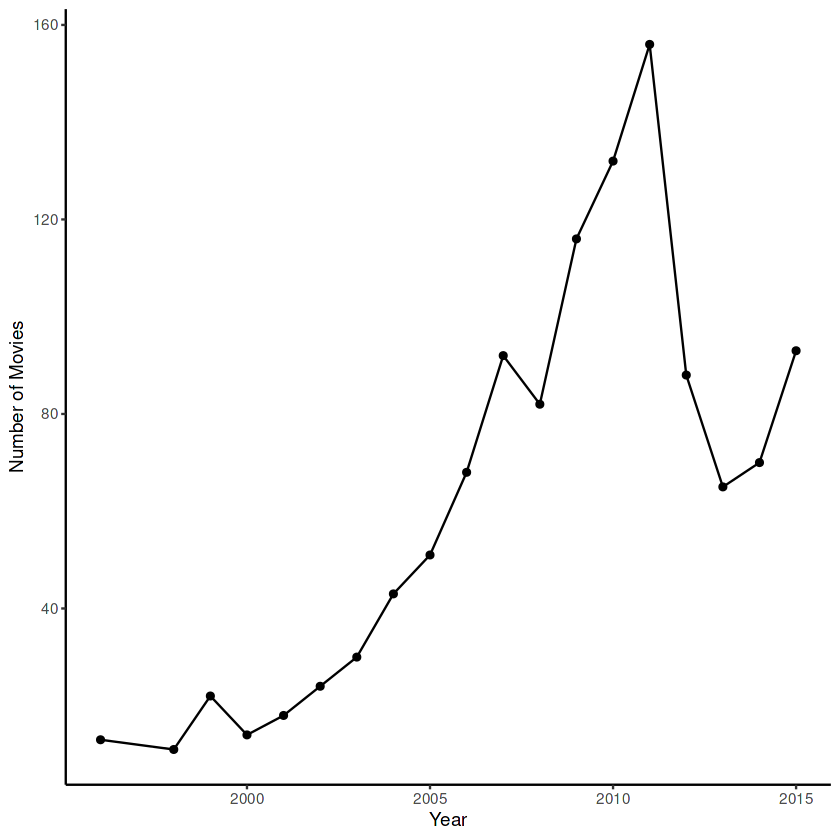

In [24]:
movies %>%
  group_by(release_year) %>%
  summarise(movie_count = n()) %>%
  filter(movie_count >= 10)  %>%
  ggplot(aes(x = release_year, y = movie_count)) +
  geom_line() +
  geom_point() +
  xlab("Year") +
  ylab("Number of Movies") +
  theme_classic()

****CORRELATION HEAT MAP****

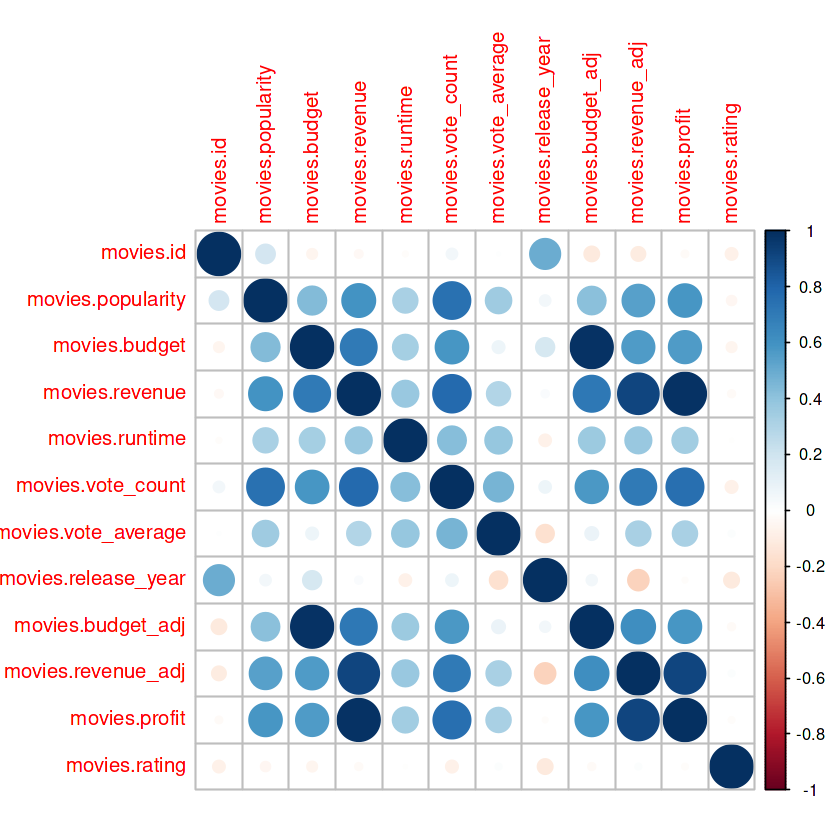

In [25]:
df=data.frame(movies$id,movies$popularity,movies$budget,movies$revenue,movies$runtime,movies$vote_count,movies$vote_average,movies$release_year,movies$budget_adj,movies$revenue_adj,movies$profit,movies$rating)
corrplot(cor(df))


List of 14
 $ call             : language cusum(data = movies$profit)
 $ type             : chr "cusum"
 $ data.name        : chr "movies$profit"
 $ data             : num [1:1287, 1] 1.36e+09 2.28e+08 1.85e+08 1.87e+09 1.32e+09 ...
  ..- attr(*, "dimnames")=List of 2
 $ statistics       : Named num [1:1287] 1.36e+09 2.28e+08 1.85e+08 1.87e+09 1.32e+09 ...
  ..- attr(*, "names")= chr [1:1287] "1" "2" "3" "4" ...
 $ sizes            : int [1:1287] 1 1 1 1 1 1 1 1 1 1 ...
 $ center           : num 1.24e+08
 $ std.dev          : num 1.16e+08
 $ pos              : num [1:1287] 10.2 10.6 10.6 25.1 34.9 ...
 $ neg              : num [1:1287] 0 0 0 0 0 0 0 0 0 0 ...
 $ head.start       : num 0
 $ decision.interval: num 5
 $ se.shift         : num 1
 $ violations       :List of 2
 - attr(*, "class")= chr "cusum.qcc"

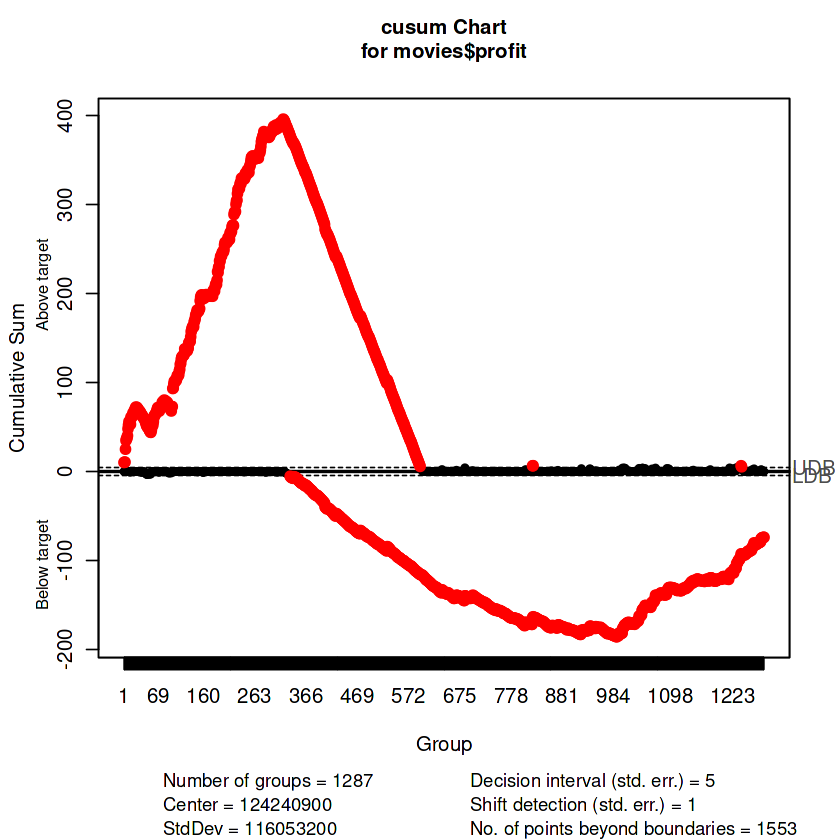

In [26]:
cusum(movies$profit)